# Q1: Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import cv2

## Storing Filedata in Array

First, we store all the image data in numpy arrays so we can work with them more easily afterwards.

In [3]:
test_normal = []
test_pneumonia = []
val_normal = []
val_pneumonia = []
train_normal = []
train_pneumonia = []

# Load in the images
for filepath in os.listdir('chest_xray/test/NORMAL/'):
    test_normal.append(cv2.imread('chest_xray/test/NORMAL/{0}'.format(filepath),0))

for filepath in os.listdir('chest_xray/test/PNEUMONIA/'):
    test_pneumonia.append(cv2.imread('chest_xray/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('chest_xray/val/NORMAL/'):
    val_normal.append(cv2.imread('chest_xray/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('chest_xray/val/PNEUMONIA/'):
    val_pneumonia.append(cv2.imread('chest_xray/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('chest_xray/train/NORMAL/'):
    train_normal.append(cv2.imread('chest_xray/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('chest_xray/train/PNEUMONIA/'):
    train_pneumonia.append(cv2.imread('chest_xray/test/PNEUMONIA/{0}'.format(filepath),0))

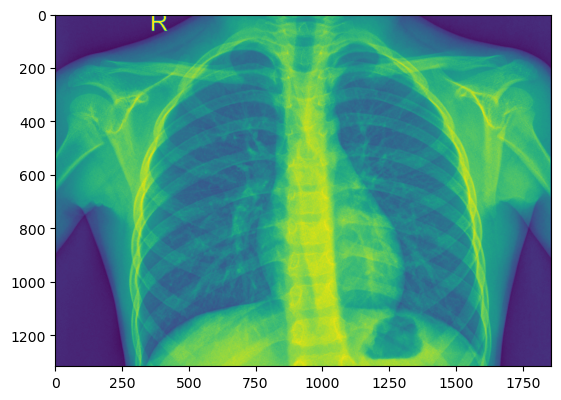

In [12]:
plt.imshow(test_normal[0])

## Plotting Image Selection 

First we plot a small selection of images to check if we can see differences between the healthy samples and the samples with Pneumonia.

In [222]:
train_normal_selection = []
train_pneumonia_selection = []

for i in range(5):
    train_normal_selection.append('chest_xray/train/NORMAL/{0}'.format(os.listdir('chest_xray/train/NORMAL/')[i]))
    train_pneumonia_selection.append('chest_xray/train/PNEUMONIA/{0}'.format(os.listdir('chest_xray/train/PNEUMONIA/')[i]))

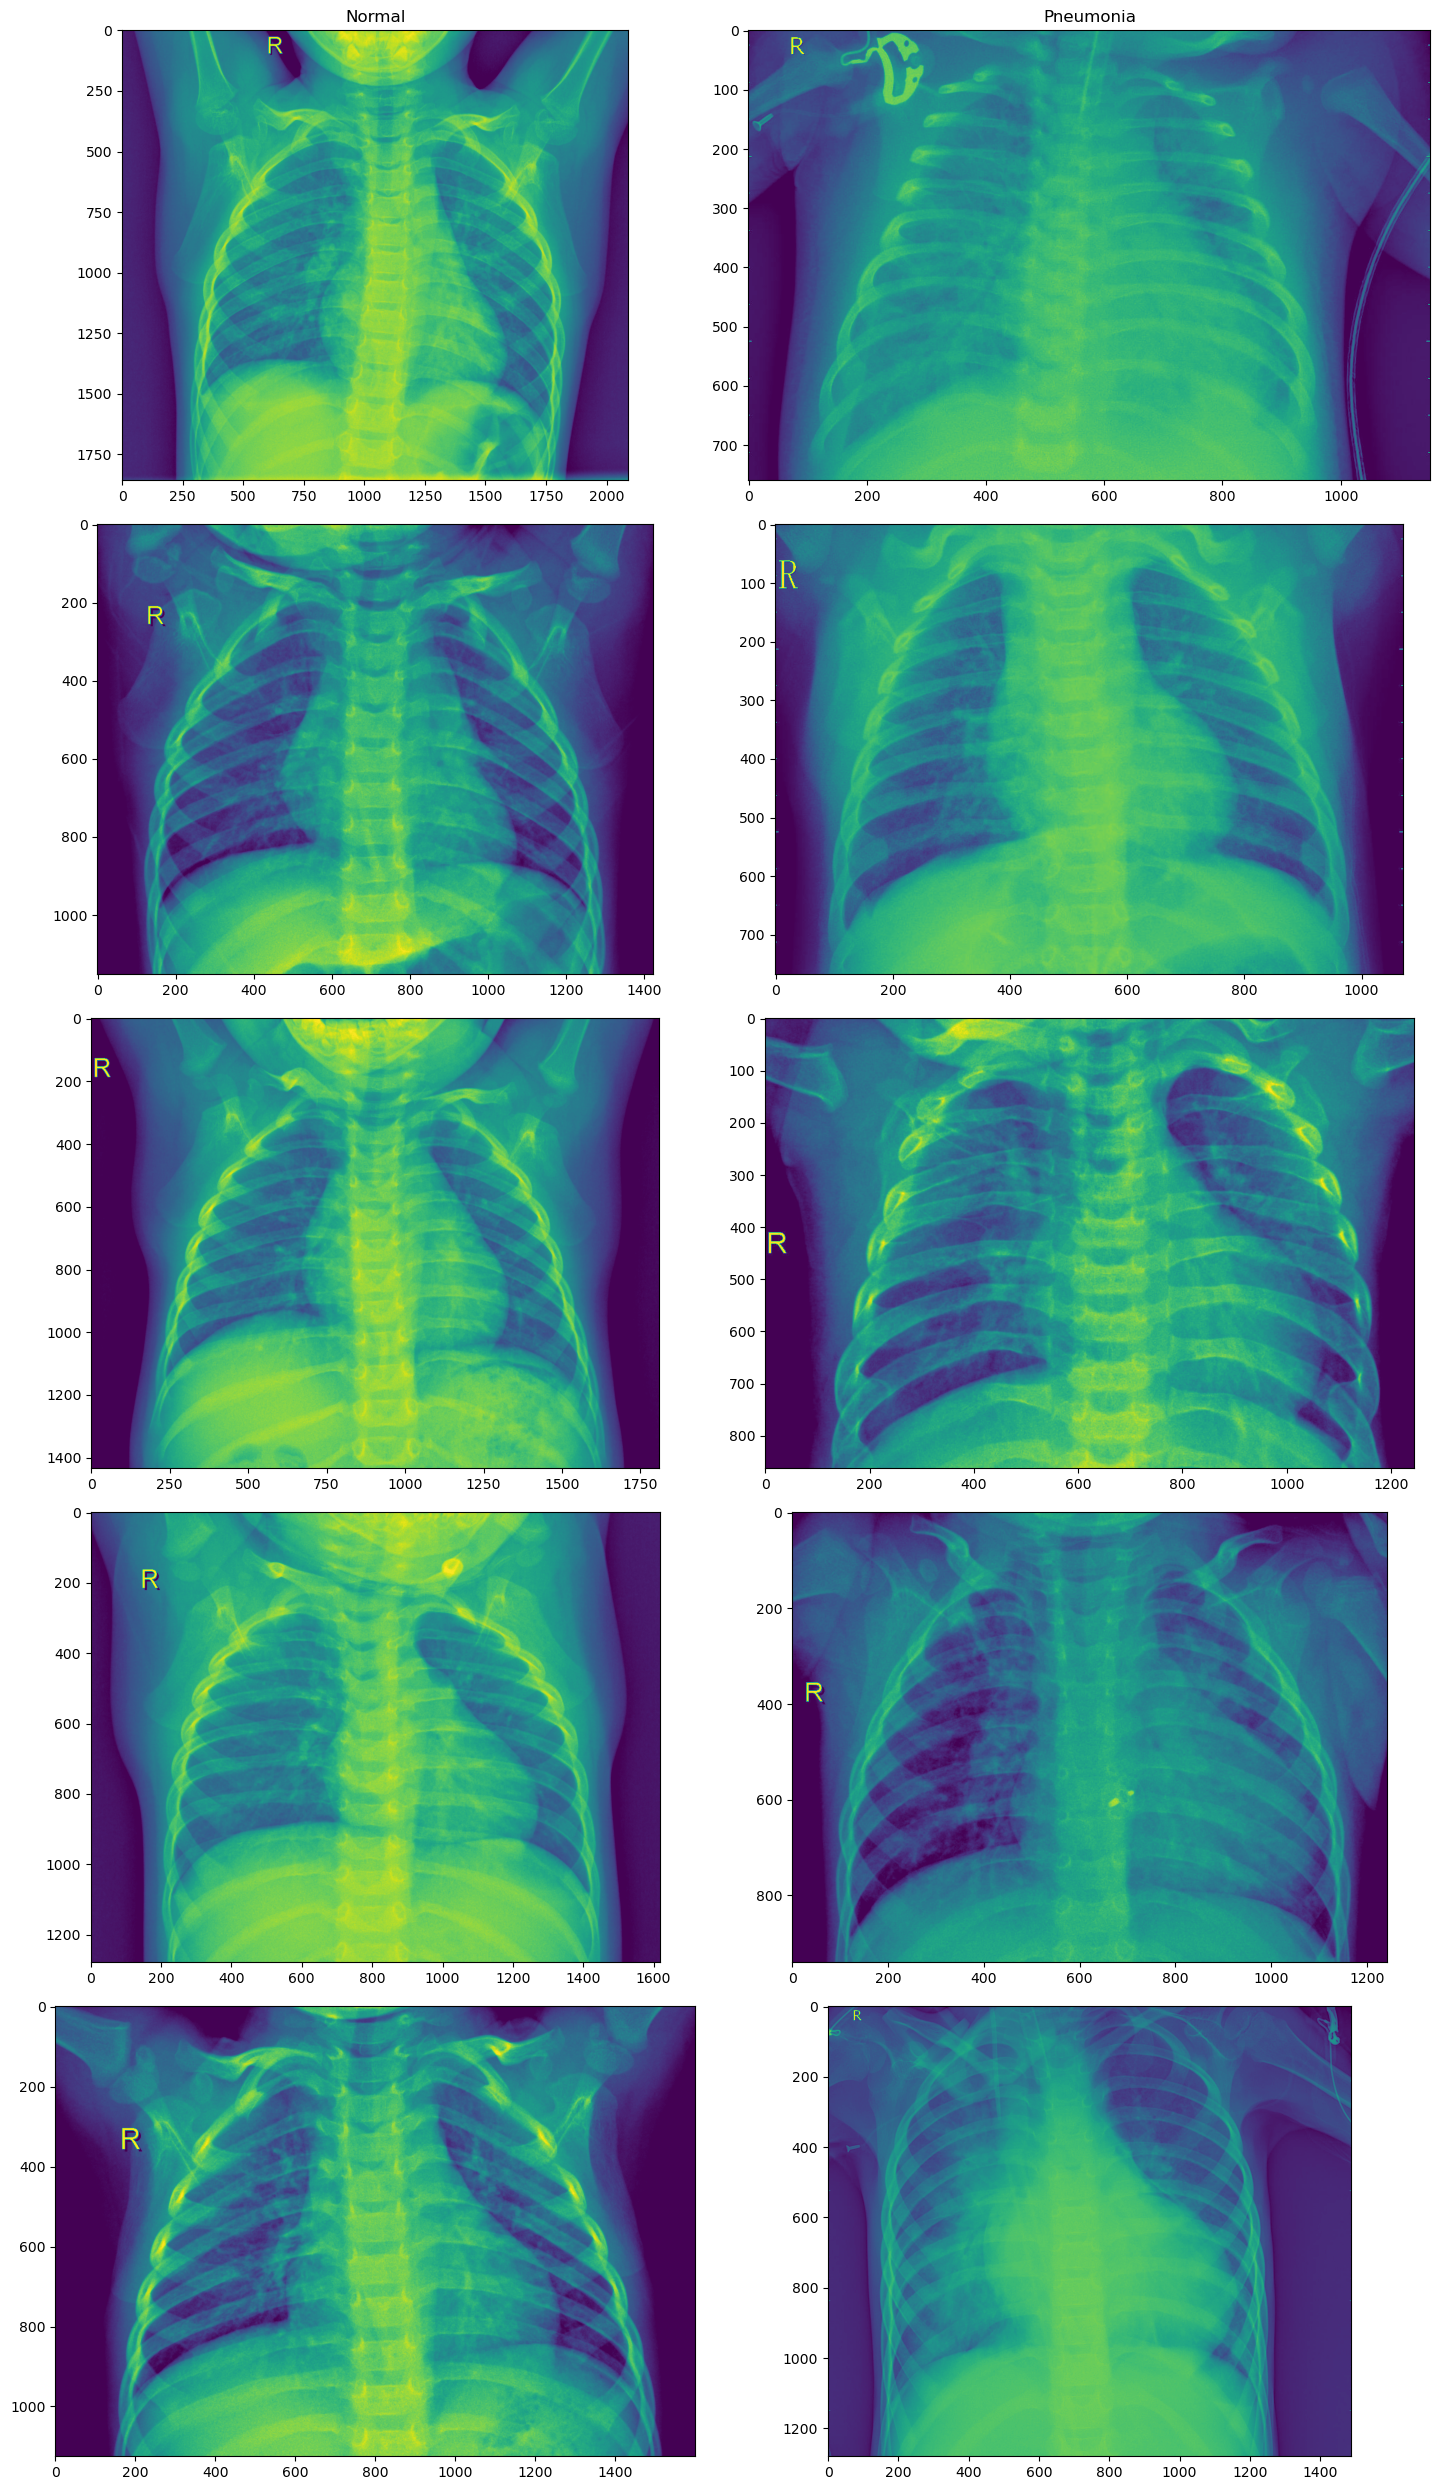

In [224]:
Cols = ['Normal', 'Pneumonia']

fig, axs = plt.subplots(5,2, figsize=(15, 25))

for i, image in enumerate(train_normal_selection):
    pic = plt.imread(image)
    axs[i,0].imshow(pic)
    axs[i,0].set()

for i, image in enumerate(train_pneumonia_selection):
    pic = plt.imread(image)
    axs[i,1].imshow(pic)
    axs[i,1].set()
    
for ax, col in zip(axs[0], Cols):
    ax.set_title(col)
    


fig.tight_layout()

When we plot the first 5 X-ray images of the training set for healthy patients (NORMAL in the left column) and patients with Pneumonia ( PNEUMONIA in the right column) we can see that the X-ray images of the patients with Pneumonia show a more cloudy texture in the area of the Lung.

We can also see that the pictures have different dimensions. That is an image property that has to be standardized before working with the images.

## Plotting Label Distribution

Now we check how the labels are distributed in the dataset and if preprocessing is necessary.

Text(0.06, 0.5, 'Number of Samples')

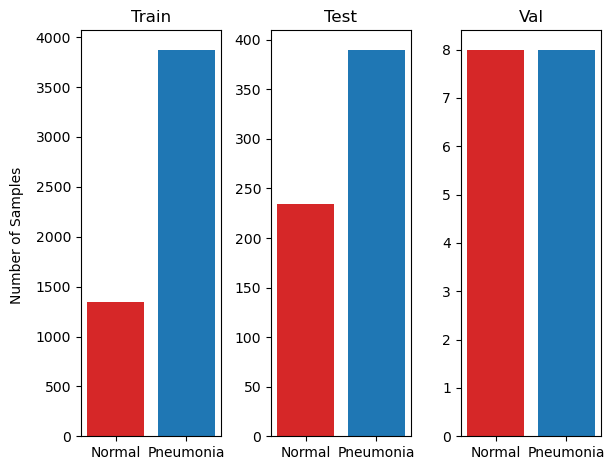

In [228]:
X = ['Normal','Pneumonia']
Train = [len(train_normal), len(train_pneumonia)]
Test = [len(test_normal), len(test_pneumonia)]
Val = [len(val_normal), len(val_pneumonia)]

fig, axs = plt.subplots(1, 3)
axs[0].bar(X, Train, color = ['tab:red', 'tab:blue'])
axs[0].set_title('Train')
axs[1].bar(X, Test, color = ['tab:red', 'tab:blue'])
axs[1].set_title('Test')
axs[2].bar(X, Val, color = ['tab:red', 'tab:blue'])
axs[2].set_title('Val')


fig.tight_layout()
plt.subplots_adjust(left  = 0.16)
fig.text(0.06, 0.5, 'Number of Samples', ha='center', va='center', rotation='vertical')


When we plot the number of samples in the dataset we can see, that the training and the test data is very unblanaced. There are more Pneumonia samples than Healthy samples in both, the train and test dataset. This is another thing we have to consider during the preprocessing steps.

## Preprocessing of Dataset

During the visualization step we found sources of bias. The images do not have the same dimensions and the label distribution is unbalanced. So now we have to preprocess the dataset.

In [6]:
test_normal = []
test_pneumonia = []
val_normal = []
val_pneumonia = []
train_normal = []
train_pneumonia = []

# Load in the images
for filepath in os.listdir('chest_xray_balanced/test/NORMAL/'):
    test_normal.append(cv2.imread('chest_xray_balanced/test/NORMAL/{0}'.format(filepath),0))

for filepath in os.listdir('chest_xray_balanced/test/PNEUMONIA/'):
    test_pneumonia.append(cv2.imread('chest_xray_balanced/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('chest_xray_balanced/val/NORMAL/'):
    val_normal.append(cv2.imread('chest_xray_balanced/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('chest_xray_balanced/val/PNEUMONIA/'):
    val_pneumonia.append(cv2.imread('chest_xray_balanced/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('chest_xray_balanced/train/NORMAL/'):
    train_normal.append(cv2.imread('chest_xray_balanced/test/PNEUMONIA/{0}'.format(filepath),0))
    
for filepath in os.listdir('chest_xray_balanced/train/PNEUMONIA/'):
    train_pneumonia.append(cv2.imread('chest_xray_balanced/test/PNEUMONIA/{0}'.format(filepath),0))

In [7]:
train_normal_selection = []
train_pneumonia_selection = []

for i in range(5):
    train_normal_selection.append('chest_xray_balanced/train/NORMAL/{0}'.format(os.listdir('chest_xray_balanced/train/NORMAL/')[i]))
    train_pneumonia_selection.append('chest_xray_balanced/train/PNEUMONIA/{0}'.format(os.listdir('chest_xray_balanced/train/PNEUMONIA/')[i]))

Text(0.06, 0.5, 'Number of Samples')

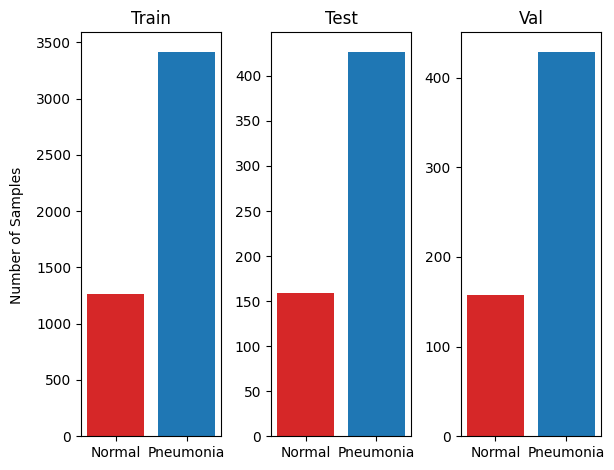

In [9]:
X = ['Normal','Pneumonia']
Train = [len(train_normal), len(train_pneumonia)]
Test = [len(test_normal), len(test_pneumonia)]
Val = [len(val_normal), len(val_pneumonia)]

fig, axs = plt.subplots(1, 3)
axs[0].bar(X, Train, color = ['tab:red', 'tab:blue'])
axs[0].set_title('Train')
axs[1].bar(X, Test, color = ['tab:red', 'tab:blue'])
axs[1].set_title('Test')
axs[2].bar(X, Val, color = ['tab:red', 'tab:blue'])
axs[2].set_title('Val')


fig.tight_layout()
plt.subplots_adjust(left  = 0.16)
fig.text(0.06, 0.5, 'Number of Samples', ha='center', va='center', rotation='vertical')

### Adjusting Image Dimensions